# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [41]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, stats
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv (r'petrol.csv')

In [43]:
df.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571.0,1976.0,0.53,541.0
1,9.0,4092.0,1250.0,0.57,524.0
2,9.0,3865.0,1586.0,0.58,561.0
3,7.5,4870.0,2351.0,0.53,414.0
4,8.0,4399.0,431.0,0.54,410.0


In [44]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax            48 non-null float64
income         48 non-null float64
highway        48 non-null float64
dl             48 non-null float64
consumption    48 non-null float64
dtypes: float64(5)
memory usage: 2.0 KB


In [45]:
df.describe ().transpose ()

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.00,7.00,7.500,8.1250,10.00
income,48.0,4241.833333,573.623768,3063.00,3739.00,4298.000,4578.7500,5342.00
highway,48.0,5565.416667,3491.507166,431.00,3110.25,4735.500,7156.0000,17782.00
dl,48.0,0.570208,0.054908,0.45,0.53,0.565,0.5925,0.72
consumption,48.0,576.770833,111.885816,344.00,509.50,568.500,632.7500,968.00


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [46]:
# IQR for tax

q75, q25 = np.percentile(df.tax.dropna(), [75 ,25])

iqr = q75 - q25
min_tax = min = q25 - (iqr*1.5)
max_tax = max = q75 + (iqr*1.5)
print (min_tax,max_tax)

5.3125 9.8125


In [47]:
# IQR for income

q75, q25 = np.percentile(df.income.dropna(), [75 ,25])

iqr = q75 - q25
min_income = min = q25 - (iqr*1.5)
max_income = max = q75 + (iqr*1.5)
print (min_income,max_income)

2479.375 5838.375


In [48]:
# IQR for highway

q75, q25 = np.percentile(df.highway.dropna(), [75 ,25])

iqr = q75 - q25
min_highway = min = q25 - (iqr*1.5)
max_highway = max = q75 + (iqr*1.5)
print (min_highway,max_highway)

-2958.375 13224.625


In [49]:
# IQR for dl

q75, q25 = np.percentile(df.dl.dropna(), [75 ,25])

iqr = q75 - q25
min_dl = min = q25 - (iqr*1.5)
max_dl = max = q75 + (iqr*1.5)
print (min_dl,max_dl)

0.43625 0.68625


In [50]:
# IQR for consumption

q75, q25 = np.percentile(df.consumption.dropna(), [75 ,25])

iqr = q75 - q25
min_consumption = min = q25 - (iqr*1.5)
max_consumption = max = q75 + (iqr*1.5)
print (min_consumption,max_consumption)

324.625 817.625


In [51]:
from scipy import stats
df_1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df_1.info ()

# outliers from original dataframe df are removed and the transformed dataframe is df_1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 47
Data columns (total 5 columns):
tax            46 non-null float64
income         46 non-null float64
highway        46 non-null float64
dl             46 non-null float64
consumption    46 non-null float64
dtypes: float64(5)
memory usage: 2.2 KB


In [52]:
df_1.describe ().transpose ()

,count,mean,std,min,25%,50%,75%,max
tax,46.0,7.740870,0.877845,6.00,7.00,7.50,8.375,10.00
income,46.0,4243.869565,585.291973,3063.00,3727.00,4298.00,4588.250,5342.00
highway,46.0,5335.934783,3049.717316,431.00,2782.75,4735.50,6923.750,14186.00
dl,46.0,0.568043,0.054062,0.45,0.53,0.56,0.590,0.72
consumption,46.0,566.891304,97.390218,344.00,508.50,566.00,630.250,865.00


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

C:\Users\Ankit Kapoor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


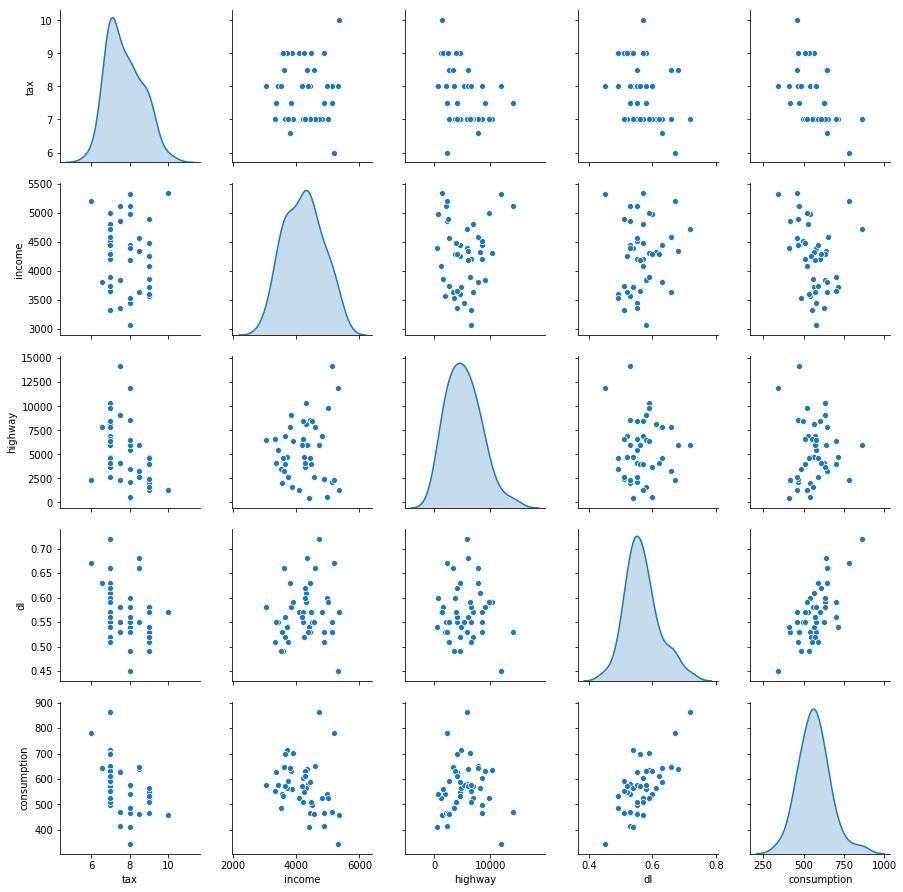

In [53]:
import seaborn as sns
sns.pairplot (df_1, diag_kind = 'kde')

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [54]:
Y = np.asarray(df_1.consumption)
A = np.asarray(df_1.tax)
B = np.asarray(df_1.dl)
Y = Y.reshape (-1,1)
A = A.reshape (-1,1)
B = B.reshape (-1,1)

In [55]:
print (Y.shape)
print (A.shape)
print (B.shape)

(46, 1)
(46, 1)
(46, 1)


In [56]:
E = np.hstack([A,B])
E.shape

(46, 2)

In [57]:
from sklearn.model_selection import train_test_split

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [79]:
E_train, E_test, Y_train, Y_test = train_test_split (E, Y, test_size=0.2, random_state=1)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression_model = LinearRegression()

In [80]:
regression_model.fit(E_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [62]:
regression_model.predict(X=E_test)

array([[477.88246675],
       [729.08963278],
       [541.3715296 ],
       [593.43908367],
       [535.43168476],
       [551.4184957 ],
       [478.34064765],
       [529.95002082],
       [525.38471866],
       [467.83550065]])

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [63]:
regression_model.score (E_train, Y_train)

0.49659447579303434

In [64]:
regression_model.score (E_test, Y_test)

0.6606504524915896

In [65]:
C = np.asarray(df_1.income)
D = np.asarray(df_1.highway)
C = C.reshape (-1,1)
D = D.reshape (-1,1)

In [72]:
F = np.hstack([A,B,C,D])
F.shape

(46, 4)

In [73]:
F_train, F_test, Y_train, Y_test = train_test_split (F, Y, test_size=0.2, random_state=1)

In [74]:
regression_model.fit(X=F_train, y=Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
regression_model.score (F_train, Y_train)

0.6975325428212713

In [83]:
regression_model.score (F_test, Y_test)

0.6415587186863252

# Question 9: Print the coefficients of the multilinear regression model

In [84]:
regression_model.coef_

array([[-3.12725919e+01,  1.08480326e+03, -7.37302403e-02,
        -1.06416473e-03]])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
# the reason why it happens is because if we increase the variables then they also interact amongst themselves to positively impact the predicted variable. Therefore it results in increasing R squared if we increase independent variables